In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
os.getcwd()

'/home/users/t_wand01/Promotion/GLE Estimation/GLE Estimation Weekly'

In [2]:
lag =13#  13 # for local renormalisation

In [3]:
DF = pd.read_csv("CompaniesStocks.csv", index_col=0)

In [4]:
# Stepanov averaging over a time window of T = 42 which is moved in one-day steps through the

In [5]:
DFShifted = DF.iloc[0:(DF.shape[0]-1)]
DFShifted.index = DF.index[1:]
DF.diff().iloc[1:].shape,DFShifted.shape

((5290, 249), (5290, 249))

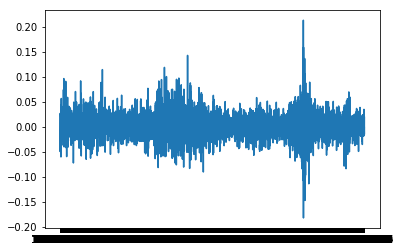

In [6]:
Returns = DF.diff().iloc[1:] / DFShifted
plt.plot(Returns["APA"])

In [7]:
# local renormalisation
#ReturnsRN = (Returns-Returns.rolling(lag).mean())/Returns.rolling(lag).std()
ReturnsRN = Returns

In [8]:
ReturnsRN.head(20)

,APA,CVX,COP,DVN,EOG,XOM,HAL,HP,HES,MRO,...,LLY,MDT,MRK,PKI,PRGO,PFE,SYK,THC,TMO,UNH
Date,,,,,,,,,,,,,,,,,,,,,
1992-01-03,-0.008064,0.009075,0.000000,0.028572,-0.006536,0.002084,-0.024590,-0.012346,0.015424,0.005154,...,0.000000,0.029571,0.015026,0.007752,0.061403,-0.004464,-0.010526,-0.015384,-0.008108,0.076530
1992-01-06,-0.016261,-0.014389,-0.025641,0.000000,-0.019737,-0.008316,-0.058823,-0.006250,0.007595,-0.061539,...,-0.004418,0.014325,-0.009623,-0.005128,0.024793,-0.007474,0.021277,0.070312,0.005449,0.014219
1992-01-07,-0.049586,-0.020073,-0.026316,-0.027778,-0.080537,-0.006290,-0.040179,-0.006289,-0.060301,-0.016393,...,0.010355,-0.028350,-0.002989,0.007732,-0.032258,0.018073,-0.015625,0.014599,-0.005420,-0.009346
1992-01-08,-0.017392,-0.005586,-0.010811,0.000000,-0.007299,-0.012658,-0.009302,0.006329,-0.050802,-0.038889,...,0.017570,-0.023873,0.000000,0.002557,0.000000,-0.004438,-0.005291,-0.021583,0.013624,0.001572
1992-01-09,-0.017698,-0.014981,-0.005464,-0.014285,0.022059,-0.006410,-0.009389,-0.012579,0.019718,0.028902,...,0.002877,-0.016304,-0.001499,0.012756,-0.033334,0.019317,0.069149,-0.058823,-0.002688,0.039247
1992-01-10,-0.009010,0.007605,0.000000,0.000000,0.028777,0.010753,0.023697,0.012739,-0.013812,-0.016854,...,-0.002869,-0.046961,-0.021021,0.012593,0.025862,-0.013119,0.017413,0.039062,-0.016173,0.001511
1992-01-13,0.027273,0.030189,0.021977,-0.028986,0.027972,0.008510,0.027777,0.006290,0.019608,0.000000,...,-0.001439,0.031884,-0.017638,0.026060,0.025211,-0.001477,-0.017115,0.015038,-0.002740,-0.016592
1992-01-14,0.017699,0.009157,0.037634,-0.044776,-0.034013,0.016878,0.013513,0.056250,0.019230,0.022857,...,-0.001441,-0.011236,0.000000,-0.007281,-0.008197,-0.011835,-0.034826,0.029630,0.002747,0.050614
1992-01-15,-0.034782,-0.007259,0.010362,0.031250,0.028169,-0.012448,0.031111,0.011834,0.002696,0.039106,...,-0.023088,-0.005682,-0.024980,0.007335,-0.008264,-0.049400,-0.005155,-0.007194,0.016439,0.033577


In [9]:
T = 5
Corr_List = list()

for i in range(ReturnsRN.shape[0]):
    Window_R = ReturnsRN.iloc[i:(T+i)]
    C = Window_R.corr()
    C_np = C.to_numpy()
    C_mean_nonan = np.mean(C_np[~np.isnan(C_np)])
   # print(i, np.round(C_np.mean(),3), np.round(C_mean_nonan,3),
    #      np.round(np.sum(np.isnan(C_np))/(C_np.shape[0]*C_np.shape[1]),3))



    #if i < 50 and i > 12:
        #print(Window_R)
        #print(C_np)
    Corr_List.append(C_mean_nonan)


/home/users/t_wand01/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/users/t_wand01/.local/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
len(Corr_List)

5290

In [11]:
Window_R

,APA,CVX,COP,DVN,EOG,XOM,HAL,HP,HES,MRO,...,LLY,MDT,MRK,PKI,PRGO,PFE,SYK,THC,TMO,UNH
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,0.018819,0.015876,0.01612,0.0174,0.018379,0.017039,0.019994,0.026576,0.032762,0.028514,...,0.014815,0.006626,0.007382,0.022881,0.01711,0.007633,0.006795,0.036387,0.013829,0.007055


In [12]:
Correlation1D = pd.DataFrame(data={"Correlation": Corr_List},
                             index = pd.to_datetime(DF.index[1:],format="%Y-%m-%d"))

In [13]:
IndexFifth = [x for x in range(4,len(Corr_List)-5,5)]
Corr_array_Fifth = np.array(Corr_List)[IndexFifth] # - 5 to avoid end-of-interval-problems
print(Corr_array_Fifth)
FifthDay = Correlation1D.index[IndexFifth]
print(len(Corr_array_Fifth))
#np.save("MarketCorrWeekly.npy"  ,Corr_array_Fifth)

[0.11584862 0.16145639 0.06570435 ... 0.19025801 0.46583138 0.30569798]
1057


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


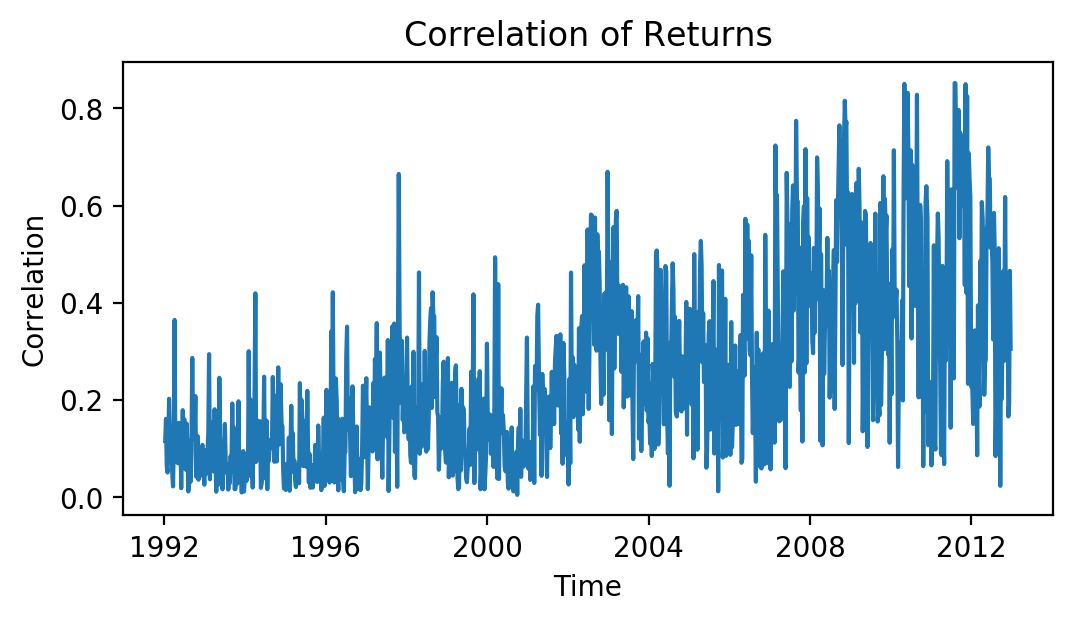

In [14]:
from matplotlib.pyplot import figure
figure(figsize=(6,3), dpi=200)
#plt.plot(Correlation1D.index,
#         Correlation1D["Correlation"])
plt.plot(FifthDay, Corr_array_Fifth)
plt.xlabel("Time")
plt.ylabel("Correlation")
plt.title("Correlation of Returns")
plt.savefig("1D_Correlation_Fifth.pdf",bbox_inches="tight")
plt.show()

In [15]:
from statsmodels.tsa.stattools import acf

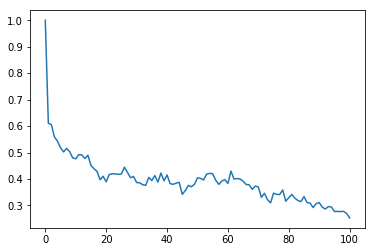

In [16]:
plt.plot(acf(Corr_array_Fifth, nlags = 100))

In [17]:
T = 42
Corr_List42 = list()

for i in range(ReturnsRN.shape[0]):
    Window_R = ReturnsRN.iloc[i:(T+i)]
    C = Window_R.corr()
    C_np = C.to_numpy()
    C_mean_nonan_42 = np.mean(C_np[~np.isnan(C_np)])
   # print(i, np.round(C_np.mean(),3), np.round(C_mean_nonan,3),
    #      np.round(np.sum(np.isnan(C_np))/(C_np.shape[0]*C_np.shape[1]),3))



    #if i < 50 and i > 12:
        #print(Window_R)
        #print(C_np)
    Corr_List42.append(C_mean_nonan_42)


/home/users/t_wand01/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/users/t_wand01/.local/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [18]:
len(Corr_List42)

5290

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a n

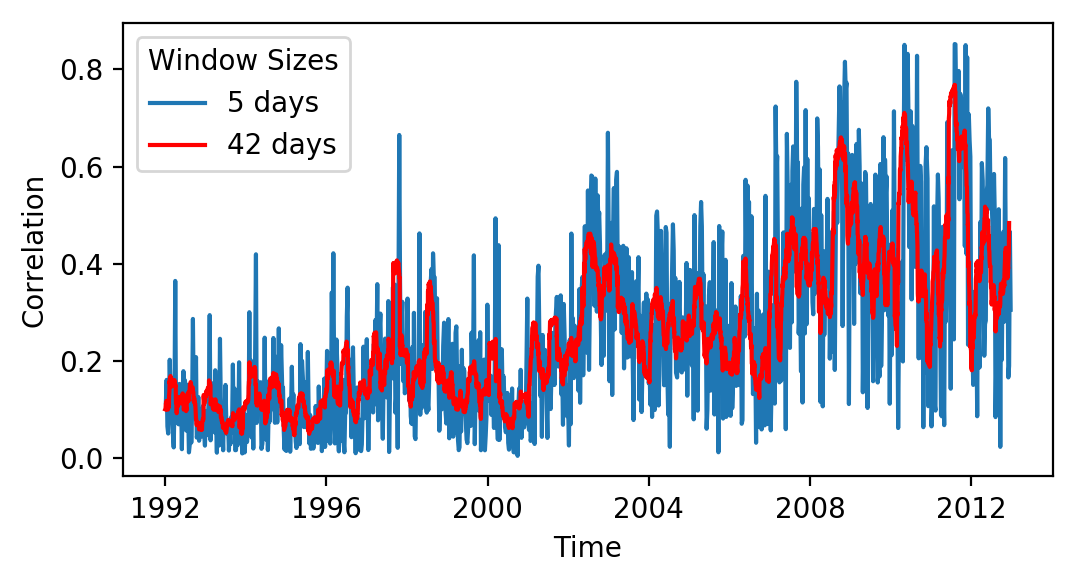

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(6,3), dpi=200)
#plt.plot(Correlation1D.index,
#         Correlation1D["Correlation"])
#plt.plot(Correlation1D.index[:-15],Corr_List[:-15], label="5 days")
plt.plot(FifthDay, Corr_array_Fifth, label="5 days")

plt.plot(Correlation1D.index[:-15], Corr_List42[:-15], c="red", label="42 days")
plt.xlabel("Time")
plt.ylabel("Correlation")
#plt.title("Correlation of Returns")
plt.legend(title="Window Sizes")
plt.savefig("1D_Correlation_Fifth_Comparison.pdf",bbox_inches="tight", dpi = 300)
plt.show()

In [20]:
DF_CP_read = pd.read_csv("ChangePoint_Dates.csv")
DF_CP_read["Changepoints"] = pd.to_datetime(DF_CP_read["Changepoints"],infer_datetime_format=True)

In [21]:
DF_CP_read["Changepoints"] 

0   1994-06-02
1   1996-08-14
2   1999-06-07
3   2001-10-03
4   2005-04-18
Name: Changepoints, dtype: datetime64[ns]

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy 

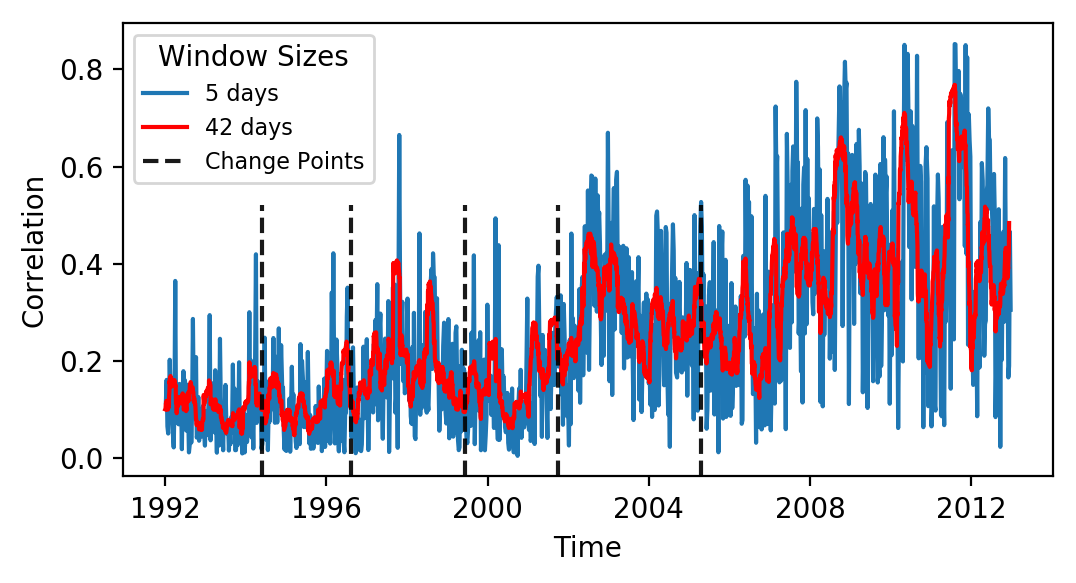

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(6,3), dpi=200)
#plt.plot(Correlation1D.index,
#         Correlation1D["Correlation"])
#plt.plot(Correlation1D.index[:-15],Corr_List[:-15], label="5 days")
plt.plot(FifthDay, Corr_array_Fifth, label="5 days")
plt.plot(Correlation1D.index[:-15], Corr_List42[:-15], c="red", label="42 days")

Label ="Change Points"
for day in DF_CP_read["Changepoints"]:
    plt.axvline(day, ymax=0.6, ls="--",c="k", label=Label, alpha = 0.9)
    Label = None
plt.xlabel("Time")
plt.ylabel("Correlation")
#plt.title("Correlation of Returns")
plt.legend(title="Window Sizes", fontsize = 8)
plt.savefig("1D_Correlation_Fifth_Comparison_with_CP.pdf",bbox_inches="tight", dpi = 300)
plt.show()

### Some DateTime tests

In [23]:
DF_CP_read["Changepoints"].loc[1] < DF_CP_read["Changepoints"].loc[0] 

False

In [24]:
# FifthDay, Corr_array_Fifth
FifthDay[1000]  < DF_CP_read["Changepoints"].loc[1] 

EndOfWeek_Split = pd.DataFrame({"Day": FifthDay,
                               "Correlation": Corr_array_Fifth})
group = list()

for d in FifthDay:
    group.append(sum(d >= DF_CP_read["Changepoints"]))  # after the how many'th change points is date d?
    
EndOfWeek_Split["Period"] = group

EndOfWeek_Split["Period"].value_counts()

5    388
4    178
2    142
0    122
3    116
1    111
Name: Period, dtype: int64

In [25]:
for period in set(EndOfWeek_Split["Period"]):
    
    Periods_DF = EndOfWeek_Split[EndOfWeek_Split["Period"]==period]
    del Periods_DF["Period"]
    
    Periods_DF.to_csv("Period"+str(period)+"/EndOfWeek_Corr_after_Changepoint_"+str(period)+".csv", index=False)
    np.save("Period"+str(period)+"/Period"+str(period)+".npy",
           Periods_DF["Correlation"].to_numpy())

## Larger Subsets

In [26]:
DF_CP_read["Changepoints"].loc[[2,4]]

2   1999-06-07
4   2005-04-18
Name: Changepoints, dtype: datetime64[ns]

In [27]:
# FifthDay, Corr_array_Fifth
FifthDay[1000]  < DF_CP_read["Changepoints"].loc[1] 

EndOfWeek_Split = pd.DataFrame({"Day": FifthDay,
                               "Correlation": Corr_array_Fifth})
group = list()

for d in FifthDay:
    group.append(sum(d >= DF_CP_read["Changepoints"].loc[[2,4]]))  # after the how many'th change points is date d?
    
EndOfWeek_Split["Period_large"] = group

EndOfWeek_Split["Period_large"].value_counts()    
    

2    388
0    375
1    294
Name: Period_large, dtype: int64

In [28]:
for period_l in set(EndOfWeek_Split["Period_large"]):
    
    Periods_DF = EndOfWeek_Split[EndOfWeek_Split["Period_large"]==period_l]
    del Periods_DF["Period_large"]
    
    
    Periods_DF.to_csv("JointPeriods"+str(period_l)+"/EndOfWeek_Corr_after_Changepoint_joint_"+str(period_l)+".csv", index=False)
    np.save("JointPeriods"+str(period_l)+"/JointPeriods"+str(period_l)+".npy",
           Periods_DF["Correlation"].to_numpy())

## Last Try: Just split the time series almost in half

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


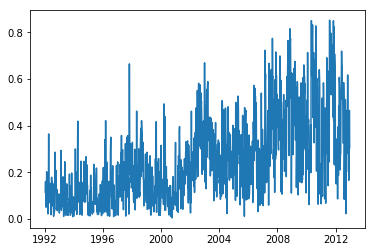

In [29]:
plt.plot(FifthDay,Corr_array_Fifth)
plt.show()

In [37]:
factor = 0.9

breaking =  int(len(Corr_array_Fifth)*factor)+1  # 0.95 works for GLE estimation

FirstCorrArrayFifth = Corr_array_Fifth[:breaking]
SecondCorrArrayFifth = Corr_array_Fifth[breaking:]

print(len(Corr_array_Fifth), len(FirstCorrArrayFifth), len(SecondCorrArrayFifth))

np.save("FirstPart_"+str(factor)+"WeeklyCorr.npy",FirstCorrArrayFifth)
np.save("SecondPart_"+str(factor)+"WeeklyCorr.npy",SecondCorrArrayFifth)


1057 952 105


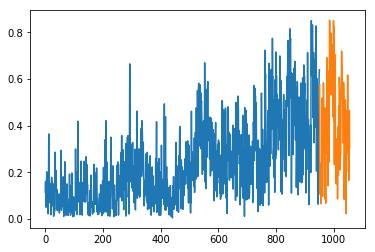

In [38]:
plt.plot(np.arange(breaking),FirstCorrArrayFifth)
plt.plot(np.arange(breaking, len(Corr_array_Fifth)),SecondCorrArrayFifth)

In [39]:
len(FirstCorrArrayFifth) + len(SecondCorrArrayFifth) - len(Corr_array_Fifth)

0